Notebook to try and assess the tightness of focus of a beam

In [48]:
from scipy.signal import correlate
from scipy.ndimage.interpolation import rotate
from matplotlib.widgets import Slider, Button
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np

In [49]:
angle = 30

path = '../raw_data/0222_focus_'
wrap  = np.array(sio.loadmat(path + 'wrap_' + str(angle) + '.mat')['data']['p'][0][0])
unwrap = np.array(sio.loadmat(path + str(angle) + '.mat')['data']['p'][0][0])

<Figure size 432x288 with 0 Axes>

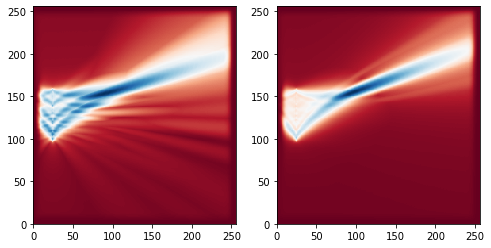

In [50]:
plt.set_cmap('RdBu')
size= 256

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
X, Y = np.meshgrid(range(size+1), range(size+1))
quad0 = ax[0].pcolormesh(X, Y, np.max(wrap, axis=2).T)
quad1 = ax[1].pcolormesh(X, Y, np.max(unwrap, axis=2).T)

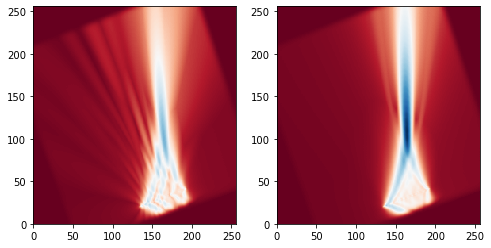

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
max = np.max(unwrap)

X, Y = np.meshgrid(range(size+1), range(size+1))
quad0 = ax[0].pcolormesh(X, Y, rotate(np.max(wrap, axis=2), angle=-angle, reshape=0), vmin = 0, vmax = max)
quad1 = ax[1].pcolormesh(X, Y, rotate(np.max(unwrap, axis=2), angle=-angle, reshape=0), vmin =0, vmax= max)

In [85]:
w = rotate(unwrap, angle)
ind = np.unravel_index(np.argmax(w, axis=None), w.shape)
ind

(125, 178, 413)

Text(0.5, 1.0, 'axial variation')

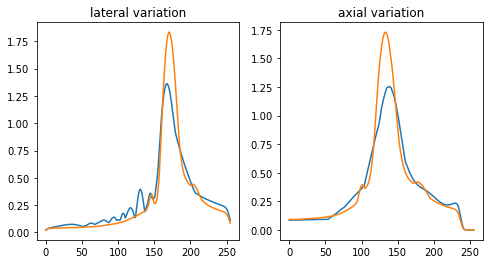

In [86]:
fig,ax = plt.subplots(1,2, figsize=(8,4))

ax[0].plot(rotate(np.max(wrap, axis=2),angle, reshape=0)[ind[0],:])
ax[0].plot(rotate(np.max(unwrap, axis=2),angle, reshape=0)[ind[0], :])

ax[1].plot(rotate(np.max(wrap, axis=2),angle, reshape=0)[:,ind[1]])
ax[1].plot(rotate(np.max(unwrap, axis=2),angle, reshape=0)[:,ind[1]])

ax[0].set_title('lateral variation')
ax[1].set_title('axial variation')

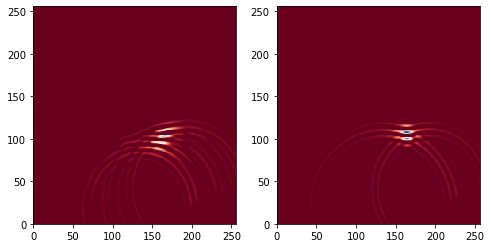

In [92]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
max = np.max(unwrap)

X, Y = np.meshgrid(range(size+1), range(size+1))
quad0 = ax[0].pcolormesh(X, Y, rotate(wrap[:,:,ind[2]], angle=-angle, reshape=0), vmin = 0, vmax = max)
quad1 = ax[1].pcolormesh(X, Y, rotate(unwrap[:,:,ind[2]], angle=-angle, reshape=0), vmin =0, vmax= max)

Text(0.5, 1.0, 'axial variation')

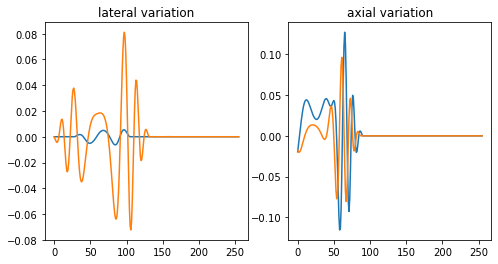

In [91]:
fig,ax = plt.subplots(1,2, figsize=(8,4))

ax[0].plot(rotate(wrap[:,:,ind[2]],angle, reshape=0)[ind[0],:])
ax[0].plot(rotate(unwrap[:,:,ind[2]],angle, reshape=0)[ind[0], :])

ax[1].plot(rotate(wrap[:,:,ind[2]],angle, reshape=0)[:,ind[1]])
ax[1].plot(rotate(unwrap[:,:,ind[2]],angle, reshape=0)[:,ind[1]])

ax[0].set_title('lateral variation')
ax[1].set_title('axial variation')